In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('netflix_titles.csv')

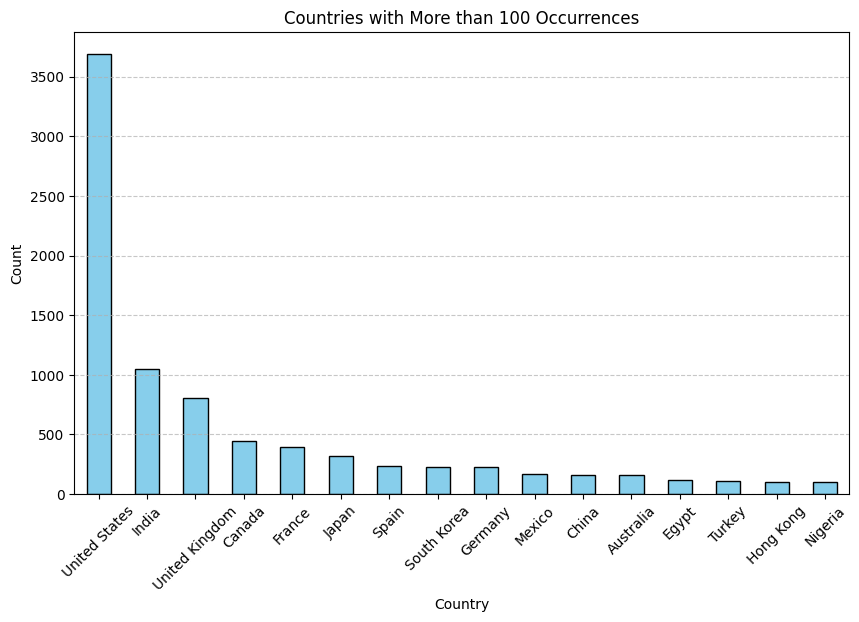

In [41]:
df["country"] = df["country"].str.split(", ")
df = df.explode("country")
country_counts = df["country"].value_counts()

filtered_countries = country_counts[country_counts > 100]
filtered_countries_df = pd.DataFrame(filtered_countries, columns=["Country"])
filtered_countries
plt.figure(figsize=(10, 6))
filtered_countries.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Countries with More than 100 Occurrences")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

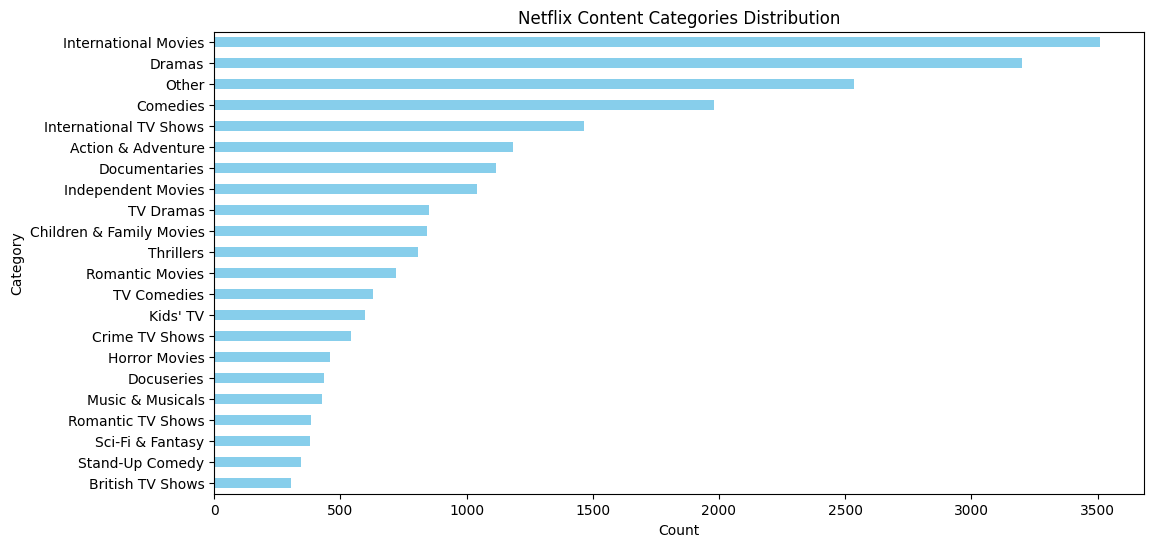

listed_in
International Movies        3509
Dramas                      3199
Comedies                    1981
International TV Shows      1465
Action & Adventure          1182
Documentaries               1116
Independent Movies          1040
TV Dramas                    852
Children & Family Movies     845
Thrillers                    806
Romantic Movies              722
TV Comedies                  630
Kids' TV                     596
Crime TV Shows               541
Horror Movies                458
Docuseries                   436
Music & Musicals             429
Romantic TV Shows            384
Sci-Fi & Fantasy             380
Stand-Up Comedy              344
British TV Shows             306
Other                       2533
Name: count, dtype: int64

In [42]:

df["listed_in"] = df["listed_in"].str.split(", ")
df_exploded = df.explode("listed_in")

category_counts = df_exploded["listed_in"].value_counts()
threshold = 300  
filtered_categories = category_counts[category_counts >= threshold]
filtered_categories["Other"] = category_counts[category_counts < threshold].sum()

plt.figure(figsize=(12, 6))
filtered_categories.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Netflix Content Categories Distribution")
plt.show()

filtered_categories

<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
C:\Users\harshil patel\AppData\Local\Temp\ipykernel_3796\2857802729.py:31: SyntaxWarning: invalid escape sequence '\d'
  df["duration"] = df["duration"].str.extract("(\d+)").astype(float)  # Extract numbers only


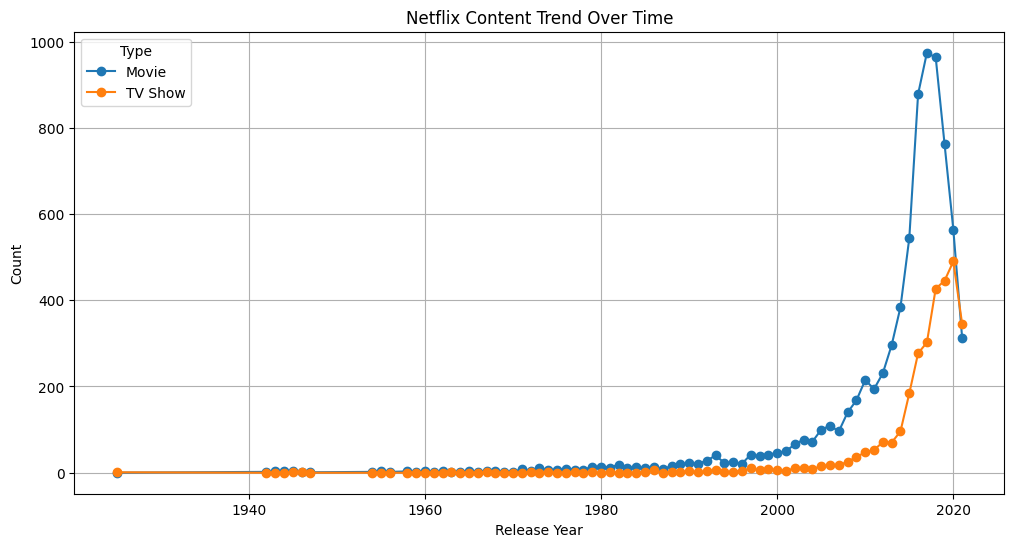

C:\Users\harshil patel\AppData\Local\Temp\ipykernel_3796\2857802729.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")


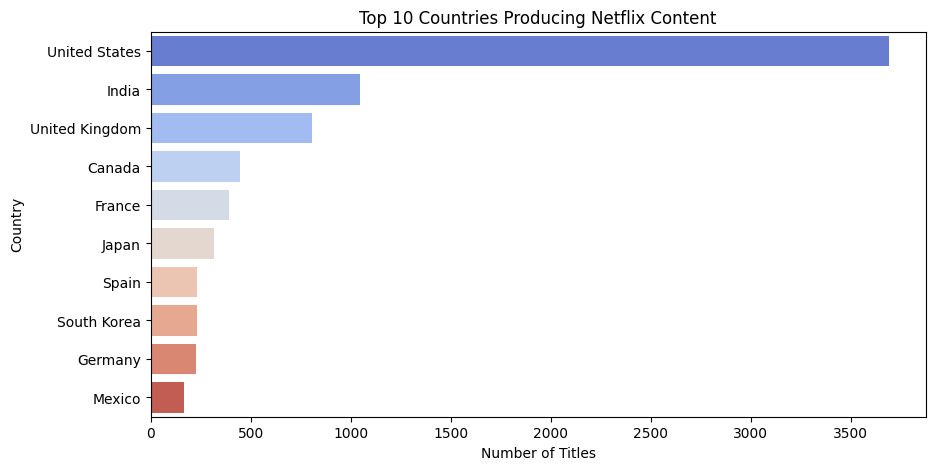

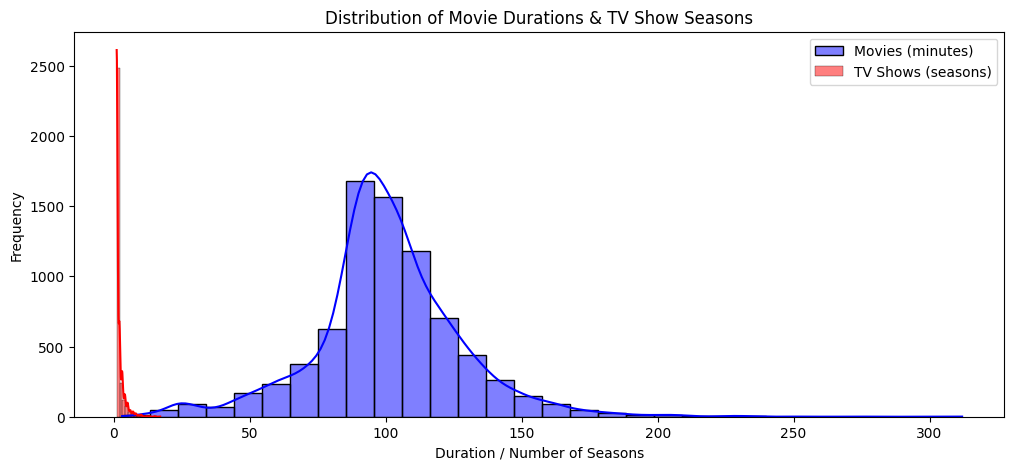

director
Rajiv Chilaka             19
Steven Spielberg          18
Raúl Campos, Jan Suter    18
Martin Scorsese           18
Youssef Chahine           17
Suhas Kadav               16
Marcus Raboy              16
Don Michael Paul          15
Martin Campbell           15
Jay Karas                 14
Name: count, dtype: int64

In [44]:

import seaborn as sns

# Convert 'release_year' to numeric and analyze content over time
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

# Count movies and TV shows by release year
content_trend = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

# Plot trend over time
plt.figure(figsize=(12, 6))
content_trend.plot(kind="line", marker="o", ax=plt.gca())
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Netflix Content Trend Over Time")
plt.legend(title="Type")
plt.grid(True)
plt.show()

# Extract top 10 contributing countries
country_counts = df_exploded["country"].value_counts().head(10)

# Plot top countries producing content
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

# Average duration of movies and number of seasons for TV shows
df["duration"] = df["duration"].str.extract("(\d+)").astype(float)  # Extract numbers only

movie_duration = df[df["type"] == "Movie"]["duration"].dropna()
tv_seasons = df[df["type"] == "TV Show"]["duration"].dropna()

# Plot distribution of movie durations and TV show seasons
plt.figure(figsize=(12, 5))
sns.histplot(movie_duration, bins=30, kde=True, color="blue", label="Movies (minutes)")
sns.histplot(tv_seasons, bins=15, kde=True, color="red", label="TV Shows (seasons)")
plt.xlabel("Duration / Number of Seasons")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Durations & TV Show Seasons")
plt.legend()
plt.show()

# Top 10 directors
top_directors = df["director"].value_counts().head(10)

# Display extracted insights
top_directors
